**Nama** : Cintha Hafrida Putri

**Email** : devdan2510@gmail.com

**Id-Dicoding** : cintha_bang

#About Dataset

Dataset ini memiliki data 1K+ Peringkat dan Ulasan Produk Amazon sesuai detailnya yang tercantum di situs web resmi Amazon

**Fitur**
product_id - ID Produk

product_name - Nama Produk

category - Kategori Produk

discounted_price - Harga Diskon Produk

actual_price - Harga Asli Produk

discount_percentage - Persentase Diskon untuk Produk

rating - Rating Produk

rating_count - Jumlah orang yang memberikan rating di Amazon

about_product - Deskripsi Produk

user_id - ID pengguna yang menulis ulasan untuk Produk

user_name - Nama pengguna yang menulis ulasan untuk Produk

review_id - ID ulasan pengguna

review_title - Judul ulasan

review_content - Isi ulasan

img_link - Link Gambar Produk

product_link - Link Resmi Produk di Situs Web

img_link - Tautan Gambar Produk

product_link - Tautan Situs Web Resmi Produk
Inspirasi

Import library dan modul

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


# Data Loading

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DICODING MACHINE LEARNING/Proyek pertama Machine Learning Terapan/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Exploratory Data Analys (EDA)


Mengubah kolom numerik yang awalnya memiliki tipe data object menjadi tipe data numerik agar dapat dilakukan analisis lanjut.

In [3]:
df.shape

(1465, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Mengidentifikasi Missing Value

In [6]:
# Identifikasi data yang hilang
missing_values = df.isnull().sum()
print("\nJumlah data yang hilang per kolom:")
print(missing_values)


Jumlah data yang hilang per kolom:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


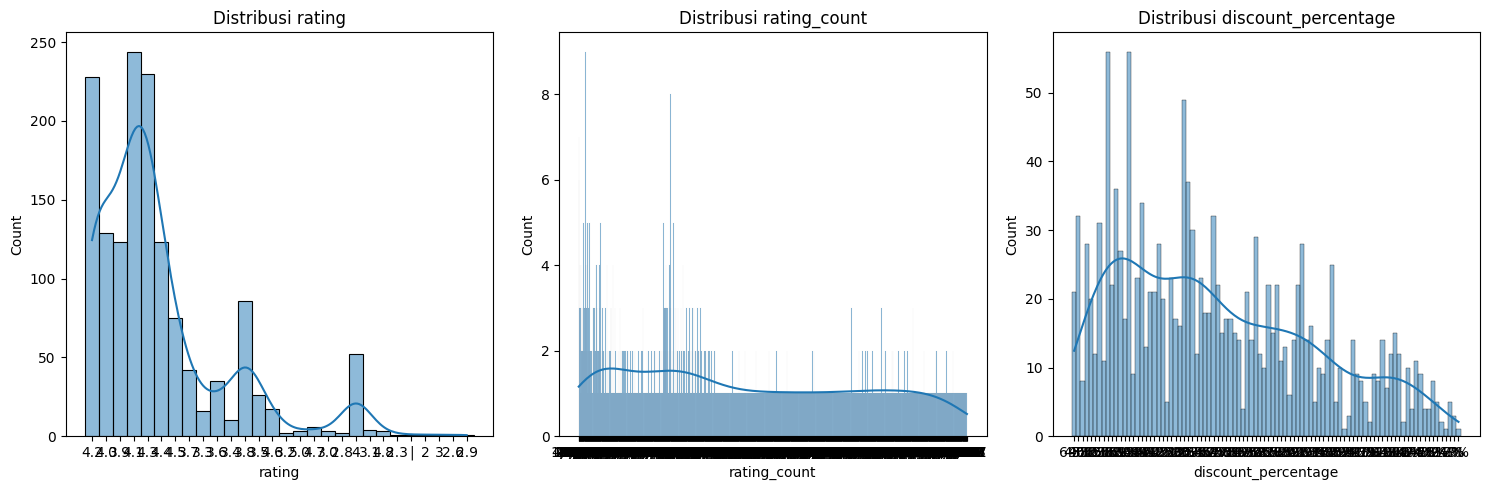

In [7]:
# Distribusi variabel numerik
numerical_cols = ['rating', 'rating_count', 'discount_percentage']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
  plt.subplot(1, 3, i)
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

#preprocessing

Dari EDA kita tahu bahwa beberapa data yang seharusnya memiliki tipe numerik sehingga membuat visualisasi kolom numerik tidak terbaca

In [10]:
# Konversi tipe data
df['discounted_price'] = df['discounted_price'].str.replace('₹','').str.replace(',','').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹','').str.replace(',','').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',','').astype(float)


In [11]:
# Analisis statistik dasar
numeric_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

# Statistik Deskriptif Variabel Numerik
print("\nStatistik Deskriptif Variabel Numerik:")
print(df[numeric_columns].describe())


Statistik Deskriptif Variabel Numerik:
       discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1464.000000   
mean        3125.310874    5444.990635            47.691468     4.096585   
std         6944.304394   10874.826864            21.635905     0.291674   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000            32.000000     4.000000   
50%          799.000000    1650.000000            50.000000     4.100000   
75%         1999.000000    4295.000000            63.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  
count    1463.000000  
mean    18295.541353  
std     42753.864952  
min         2.000000  
25%      1186.000000  
50%      5179.000000  
75%     17336.500000  
max    426973.000000  


Handling Missing Value

Mengisi missing value menggunakan median, karena kolom rating menggunakan skala 1-5 sehingga jika menggunakan mean bisa membuat data yang diisikan tidak umum (4.222). Kolom rating_count juga diisi dengan median karena memiliki distribusi skewed.

In [12]:
# Rating
df['rating'].fillna(df['rating'].median(), inplace=True)

# Rating Count
df['rating_count'].fillna(df['rating_count'].median(), inplace=True)

In [13]:
# cek update data hilang
missing_values = df.isnull().sum()
print("\nJumlah data yang hilang per kolom:")
print(missing_values)


Jumlah data yang hilang per kolom:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [15]:
# Memisahkan kolom numerikal dan kategorikal
numerical_columns = df.select_dtypes(include=['float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print(f"Kolom numerikal: {list(numerical_columns)}")
print(f"Kolom kategorikal: {list(categorical_columns)}")

Kolom numerikal: ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
Kolom kategorikal: ['product_id', 'product_name', 'category', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']


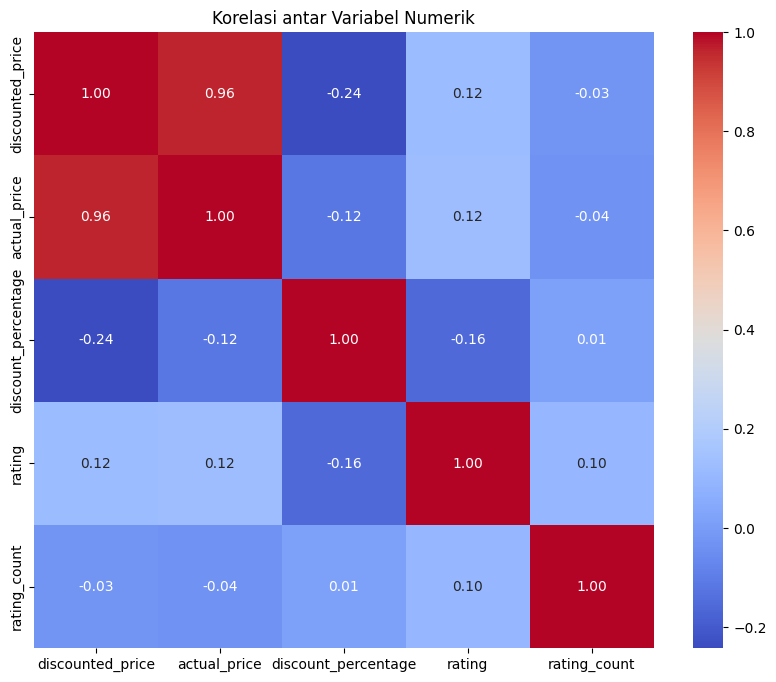

In [16]:
"""Visualisasi korelasi antar variabel numerik"""
numerical_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Variabel Numerik')
plt.show()

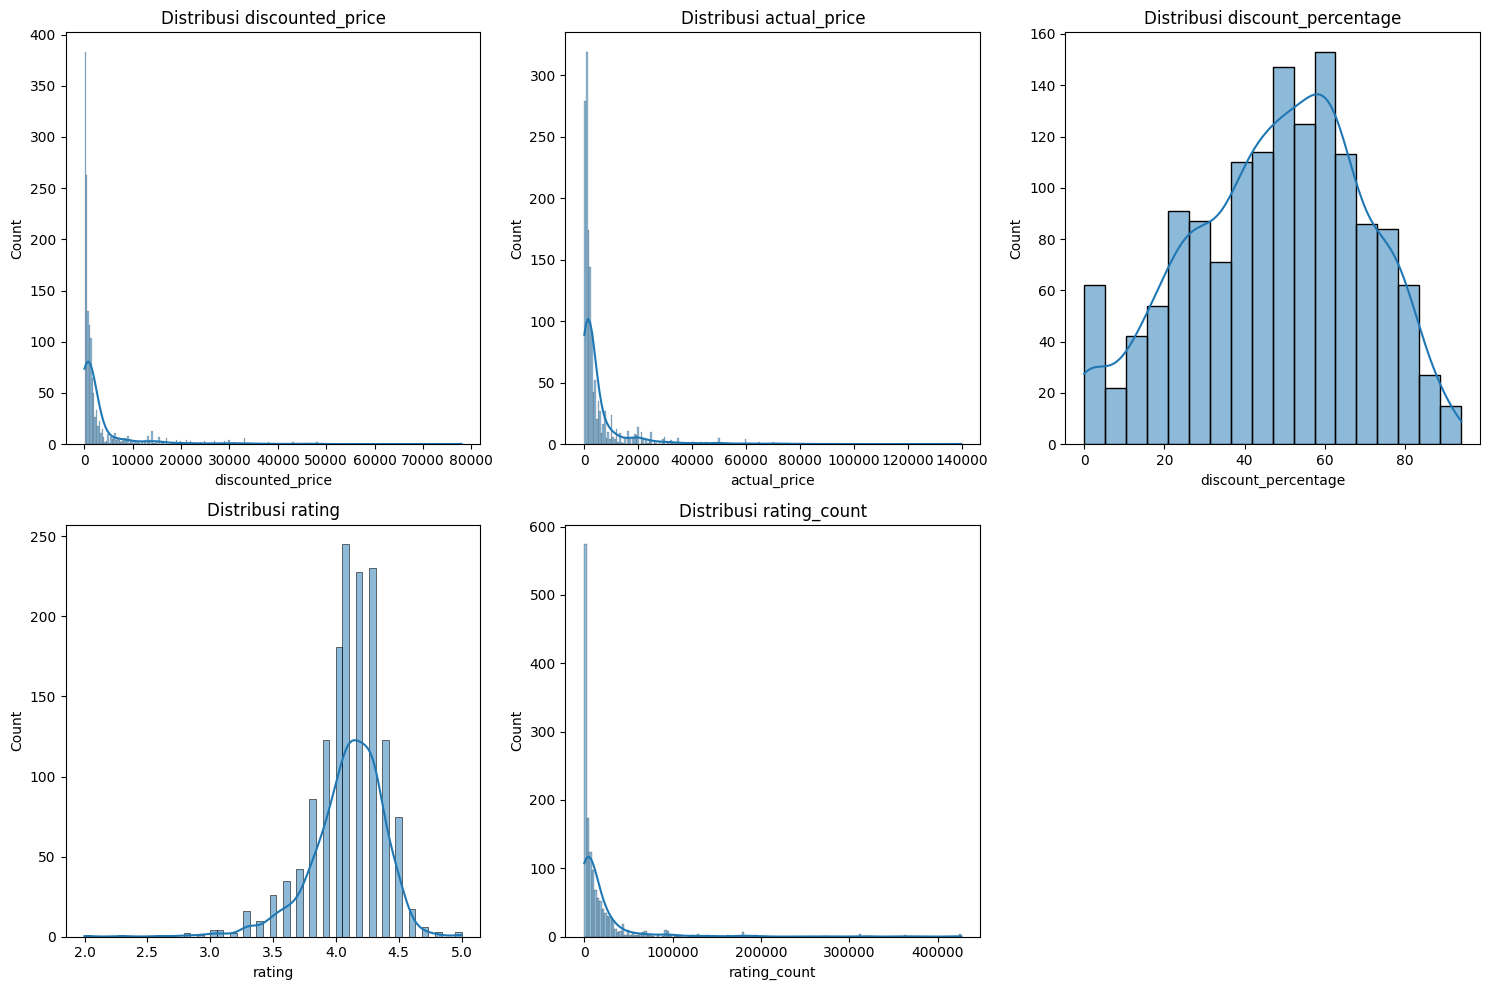

In [18]:
# Visualisasi distribusi kolom numerik
numerical_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
  plt.subplot(2, 3, i)
  sns.histplot(df[column], kde=True)
  plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

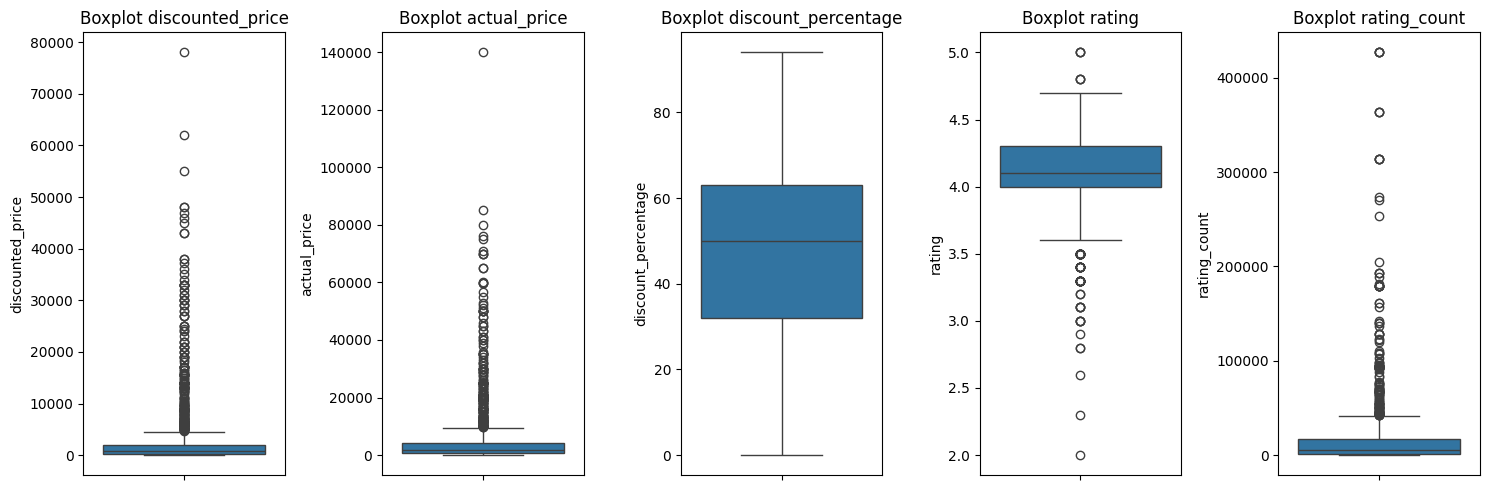

In [17]:
"""Analisis outlier menggunakan box plots"""
numerical_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

Outlier pada actual_price, discounted_price, rating_count adalah hal yang normal karena memang datanya pasti bervariasi. berbeda dengan discount_precentage dan rating yang datanya cenderung normal

# Modelling


## Model 1 K-Means

In [86]:
# Select features for clustering
features = ['rating', 'rating_count', 'discount_percentage']
data_selected_features = df[features]

In [87]:
scaler = StandardScaler()
numeric_features = ['rating', 'rating_count', 'discount_percentage']  # Hanya fitur numerik yang relevan
data_selected_features[numeric_features] = scaler.fit_transform(data_selected_features[numeric_features])

Data Splitting

In [88]:
# Pembagian data menjadi data train dan test
X_train, X_test = train_test_split(data_selected_features, test_size=0.2, random_state=42)

In [89]:
# Setelah pembagian, lanjutkan dengan K-Means
inertias = []
silhouette_scores = []
ch_scores = []

K = range(2, 11)  # Jumlah cluster yang ingin diuji

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X_train, kmeans.labels_))


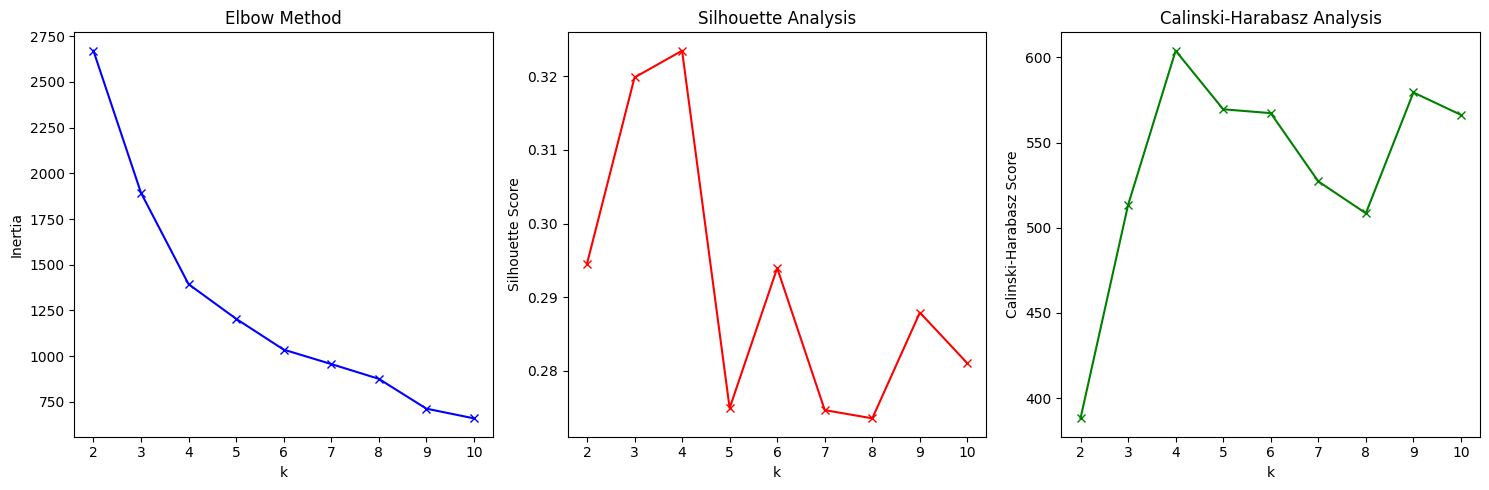

In [90]:
# Plot metrics
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 3, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.subplot(1, 3, 3)
plt.plot(K, ch_scores, 'gx-')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Analysis')

plt.tight_layout()
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.2945279830290616
For n_clusters = 3, the average silhouette_score is : 0.31982427561614596
For n_clusters = 4, the average silhouette_score is : 0.32345712274837074
For n_clusters = 5, the average silhouette_score is : 0.27494128013615676
For n_clusters = 6, the average silhouette_score is : 0.29395788278190177
For n_clusters = 7, the average silhouette_score is : 0.27467515302241685
For n_clusters = 8, the average silhouette_score is : 0.2735596571811475
For n_clusters = 9, the average silhouette_score is : 0.28791833712680925
For n_clusters = 10, the average silhouette_score is : 0.2810198951246453


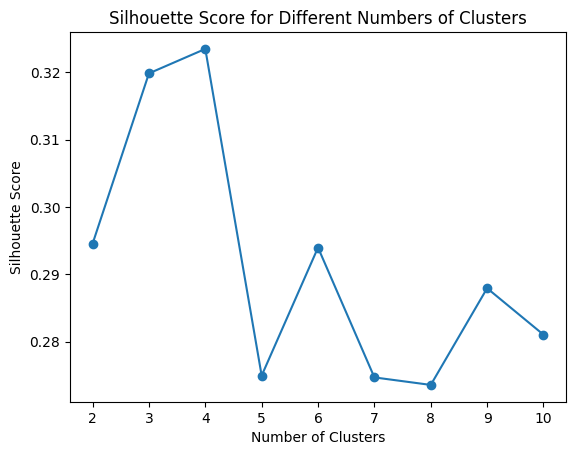

In [91]:
silhouette_scores = []
for n_clusters in range(2, 11):  # Uji jumlah cluster dari 2 hingga 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plot silhouette scores untuk setiap jumlah cluster
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.show()

In [92]:

df['price_ratio'] = df['actual_price'] / df['discounted_price']

df['review_length'] = df['review_content'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)

features = ['rating', 'rating_count', 'discount_percentage', 'price_ratio', 'review_length']

data_selected_features = df[features]


In [93]:
# Pembagian data menjadi data train dan test
X_train, X_test = train_test_split(data_selected_features, test_size=0.2, random_state=42)

In [94]:
# Setelah pembagian, lanjutkan dengan K-Means
inertias = []
silhouette_scores = []
ch_scores = []

K = range(2, 11)  # Jumlah cluster yang ingin diuji

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X_train, kmeans.labels_))


For n_clusters = 2, the average silhouette_score is : 0.9032547456596205
For n_clusters = 3, the average silhouette_score is : 0.7930762451563913
For n_clusters = 4, the average silhouette_score is : 0.7090539496489543
For n_clusters = 5, the average silhouette_score is : 0.7075247268934253
For n_clusters = 6, the average silhouette_score is : 0.6951976342139073
For n_clusters = 7, the average silhouette_score is : 0.6893809688719975
For n_clusters = 8, the average silhouette_score is : 0.6707522292532587
For n_clusters = 9, the average silhouette_score is : 0.6715678475658149
For n_clusters = 10, the average silhouette_score is : 0.6312394097968133


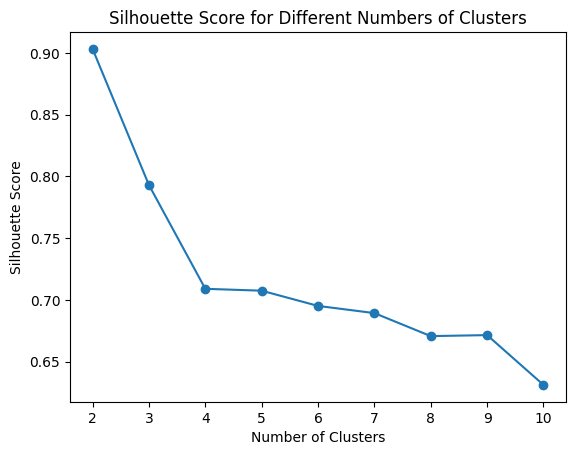

In [95]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plot silhouette scores untuk setiap jumlah cluster
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.show()

In [105]:
# Clustering dengan Jumlah Cluster Optimal
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(data_selected_features)

# Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(data_selected_features, kmeans_labels)
print(f"Silhouette Score untuk {optimal_clusters} clusters: {silhouette_avg}")

# Menambahkan label cluster ke DataFrame asli
df['Cluster'] = kmeans_labels
print(df[['Cluster'] + features].head()) # Assuming selected_features is defined

Silhouette Score untuk 2 clusters: 0.8997343627882889
   Cluster  rating  rating_count  discount_percentage  price_ratio  \
0        0     4.2       24269.0                 64.0     2.754386   
1        0     4.0       43994.0                 43.0     1.753769   
2        0     3.9        7928.0                 90.0     9.542714   
3        0     4.2       94363.0                 53.0     2.124620   
4        0     4.2       16905.0                 61.0     2.590909   

   review_length  
0            483  
1           1186  
2            271  
3            443  
4           2451  


In [107]:
cluster_characteristics = df.groupby('Cluster')[features].describe()
print(cluster_characteristics)


         rating                                              rating_count  \
          count      mean       std  min  25%  50%  75%  max        count   
Cluster                                                                     
0        1423.0  4.094659  0.294511  2.0  4.0  4.1  4.3  5.0       1423.0   
1          42.0  4.161905  0.151339  3.8  4.1  4.1  4.3  4.5         42.0   

                        ... price_ratio            review_length               \
                  mean  ...         75%        max         count         mean   
Cluster                 ...                                                     
0         12270.216444  ...    2.693285  17.003401        1423.0  1373.343640   
1        221814.690476  ...    2.798845   4.530744          42.0  2098.666667   

                                                             
                 std    min    25%     50%     75%      max  
Cluster                                                      
0        1794.726633  

## Visualisasi Hasil Clustering K-Means


In [108]:
cluster_0 =['Cluster'] == 0
cluster_1 =['Cluster'] == 1


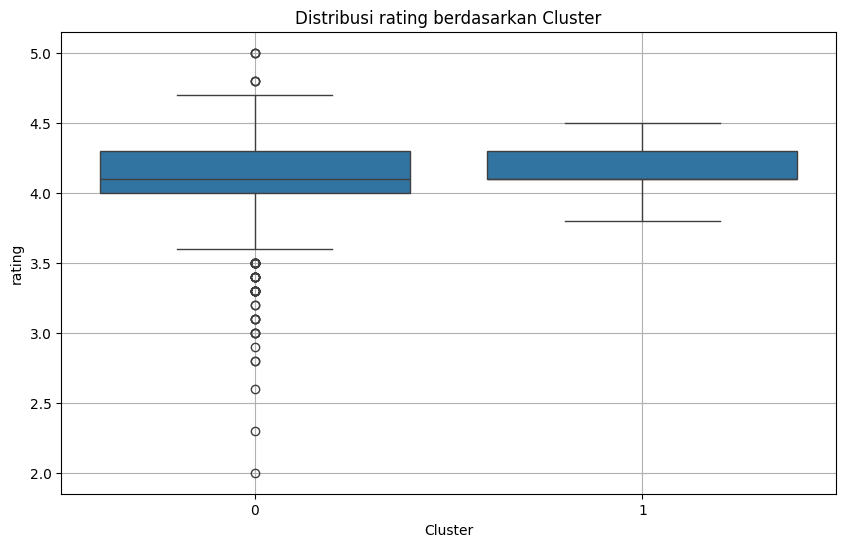

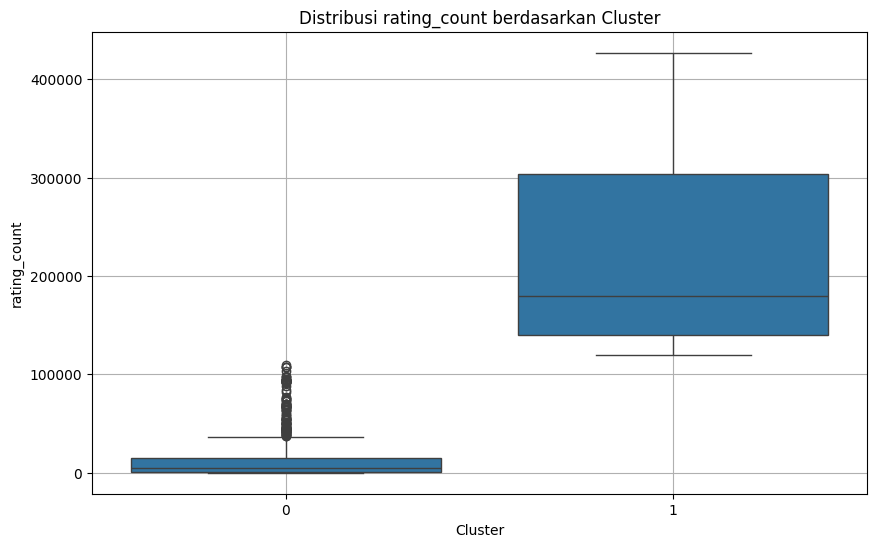

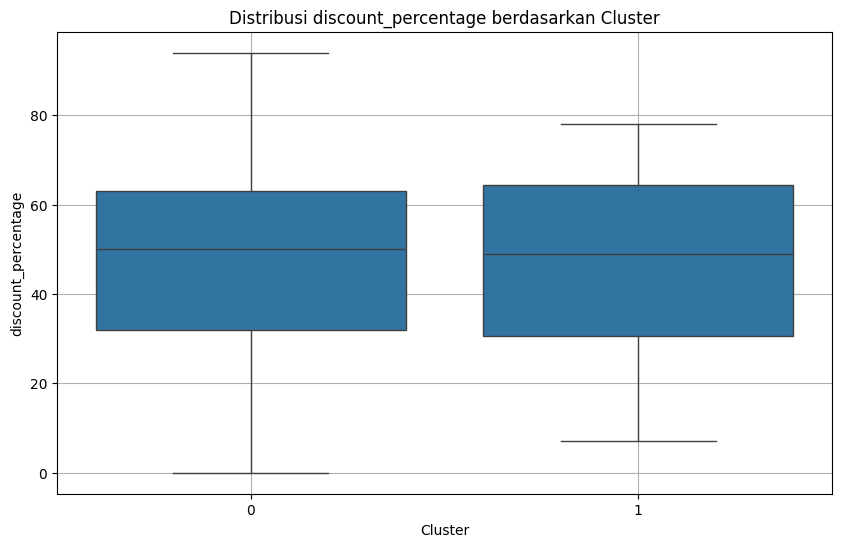

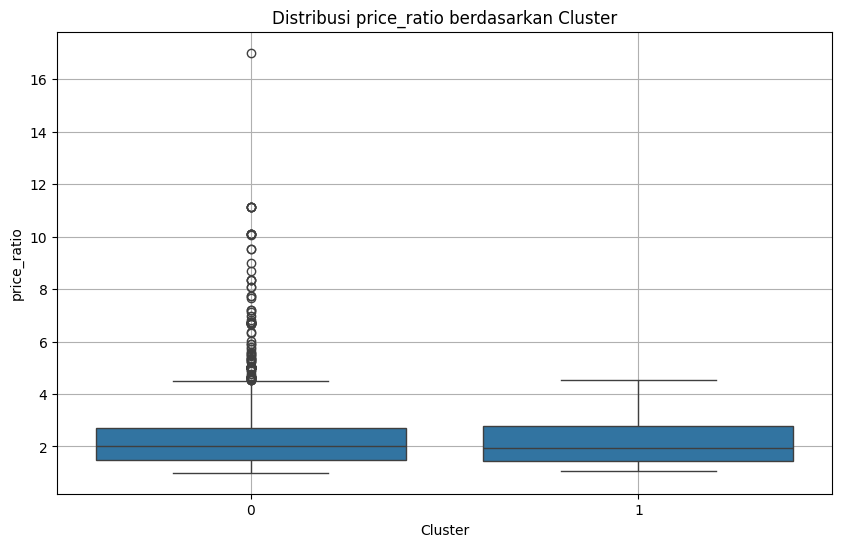

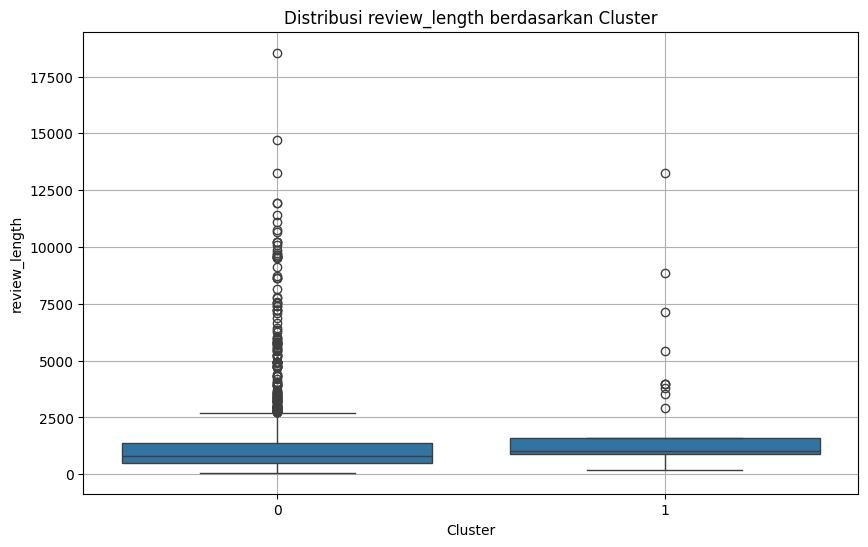

In [110]:
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Cluster', y=feature)
    plt.title(f'Distribusi {feature} berdasarkan Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid()
    plt.show()

Berdasarkan visualisasi yang diberikan, berikut adalah analisis karakteristik untuk setiap cluster:

**Cluster 0:**

Review Length: Memiliki banyak outlier dengan review yang sangat panjang (hingga 17500 karakter), namun median sekitar 1000-1500 karakter

Price Ratio: Memiliki outlier hingga 16x lipat, dengan median sekitar 2x

Discount Percentage: Median diskon sekitar 50% dengan rentang 30-65%

Rating Count: Jumlah rating relatif rendah (median <50000)

Rating: Median rating sekitar 4.1 dengan beberapa outlier rendah hingga 2.0

Analisis:
Cluster 0 merepresentasikan produk dengan engagement pengguna yang lebih rendah namun memiliki review yang lebih detail. Produk-produk ini cenderung memiliki variasi harga yang ekstrem dan diskon yang moderat. Meski jumlah rating rendah, rating keseluruhan cukup baik dengan beberapa kasus ketidakpuasan.



**Cluster 1:**

Review Length: Lebih konsisten dengan sedikit outlier, median sekitar 1000-1500 karakter

Price Ratio: Lebih stabil dengan median sekitar 2x dan sedikit outlier

Discount Percentage: Distribusi diskon mirip dengan Cluster 0

Rating Count: Jumlah rating sangat tinggi (median >150000)

Rating: Rating lebih konsisten dengan median sekitar 4.2
Analisis:

Cluster 1 merepresentasikan produk populer dengan engagement tinggi. Review cenderung lebih singkat namun konsisten. Harga dan diskon lebih stabil dibanding Cluster 0. Produk-produk ini memiliki basis pengguna yang besar dengan rating yang konsisten tinggi, menunjukkan kualitas dan kepuasan pelanggan yang lebih terjamin.

## Model DBSCAN


In [120]:

# Pilih fitur yang akan digunakan untuk clustering
features = ['rating', 'rating_count', 'discount_percentage']
data_selected_features_dbscan = df[features]

# Penskalaan data
scaler = StandardScaler()
data_selected_features_dbscan = scaler.fit_transform(data_selected_features_dbscan)

# Membuat model DBSCAN dengan parameter yang dapat disesuaikan
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Melakukan clustering
dbscan_labels = dbscan.fit_predict(data_selected_features_dbscan)

# Menambahkan label cluster ke DataFrame asli
df['Cluster_DBSCAN'] = dbscan_labels

# Evaluasi model: Periksa jumlah kluster dan noise
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

# Menghitung metrik evaluasi jika ada lebih dari satu kluster
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(data_selected_features_dbscan, dbscan_labels)
    calinski_harabasz = calinski_harabasz_score(data_selected_features_dbscan, dbscan_labels)
    davies_bouldin = davies_bouldin_score(data_selected_features_dbscan, dbscan_labels)

    print("\nDBSCAN Clustering Evaluation Metrics:")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Calinski-Harabasz Score: {calinski_harabasz}")
    print(f"Davies-Bouldin Score: {davies_bouldin}")
else:
    print("DBSCAN failed to form multiple clusters, consider adjusting eps or min_samples.")

# Menampilkan hasil clustering pada DataFrame
print(df[['Cluster_DBSCAN'] + features].head())


Estimated number of clusters: 4
Estimated number of noise points: 68

DBSCAN Clustering Evaluation Metrics:
Silhouette Score: 0.3554689722570361
Calinski-Harabasz Score: 75.51625032790999
Davies-Bouldin Score: 1.9744347471276693
   Cluster_DBSCAN  rating  rating_count  discount_percentage
0               0     4.2       24269.0                 64.0
1               0     4.0       43994.0                 43.0
2               0     3.9        7928.0                 90.0
3               0     4.2       94363.0                 53.0
4               0     4.2       16905.0                 61.0


Score Silhouette DBSCAN ternyata bernilai lebih rendah daripada K-Means

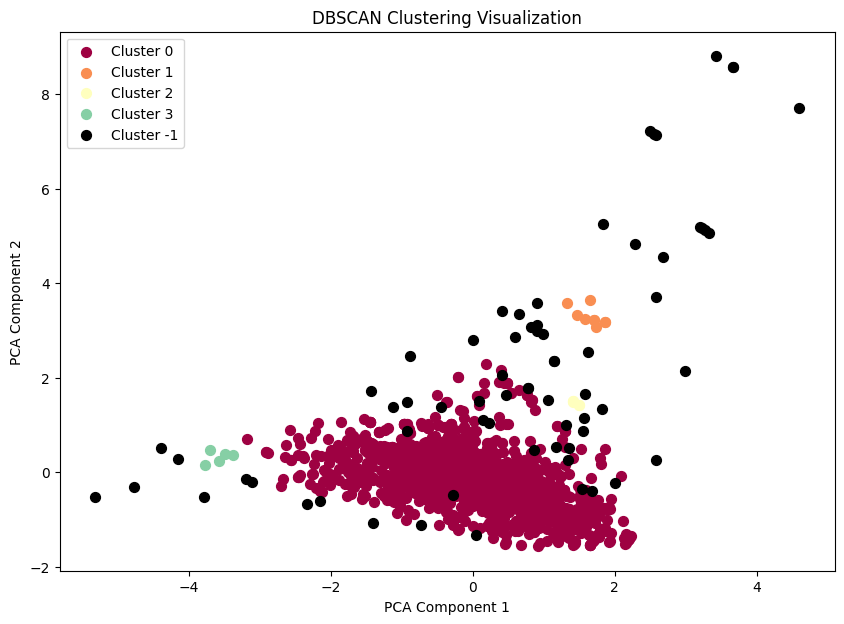

In [121]:

# Reduksi dimensi menggunakan PCA untuk visualisasi 2D
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_selected_features_dbscan)

# Membuat scatter plot hasil klustering
plt.figure(figsize=(10, 7))
unique_labels = set(dbscan_labels)

# Warna untuk setiap kluster, termasuk noise (label -1)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Warna untuk noise
        col = [0, 0, 0, 1]

    class_member_mask = (dbscan_labels == k)

    xy = data_2d[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], label=f'Cluster {k}')

plt.title('DBSCAN Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()